# Setup

Once the notebook is started, the package can be imported.

In [1]:
import drg

The central class is `drg.DRGParameters`, which can be given an intersection array in the form of two lists or tuples of the same length.

In [2]:
syl = drg.DRGParameters([5, 4, 2], [1, 1, 4])
syl

Parameters of a distance-regular graph with intersection array {5, 4, 2; 1, 1, 4}

Instead of an intersection array, parameters $(k, \lambda, \mu)$ for a strongly regular graph or classical parameters $(d, b, \alpha, \beta)$ may also be specified.

In [3]:
petersen = drg.DRGParameters(3, 0, 1)
petersen

Parameters of a distance-regular graph with intersection array {3, 2; 1, 1}

In [4]:
q7 = drg. DRGParameters(7, 1, 0, 1)
q7

Parameters of a distance-regular graph with intersection array {7, 6, 5, 4, 3, 2, 1; 1, 2, 3, 4, 5, 6, 7}

The intersection array (given in any of the forms above) may also contain variables. Substitution of variables is possible using the `subs` method. Note that the diameter must be constant.

In [5]:
r = var("r")
fam = drg.DRGParameters([2*r^2*(2*r+1), (2*r-1)*(2*r^2+r+1), 2*r^2], [1, 2*r^2 , r*(4*r^2-1)])
fam1 = fam.subs(r == 1)
fam1

Parameters of a distance-regular graph with intersection array {6, 4, 2; 1, 2, 3}

# Parameter computation

As a `drg.DRGParameters` object is being constructed, its intersection numbers are computed. If any of them is determined to be negative or nonintegral, then an exception is thrown and the construction is aborted. Several other conditions are also checked, for example that the sequences $\{b_i\}_{i=0}^d$ and $\{c_i\}_{i=0}^d$ are non-ascending and non-descending, respectively, and that $b_j \ge c_i$ if $i + j \le d$. The handshake lemma is also checked for each subconstituent. If the graph is determined to be antipodal, then the covering index is also checked for integrality.

The number of vertices, their valency and the diameter of the graph can be obtained with the `order`, `valency`, and `diameter` methods.

In [6]:
syl.order(), syl.valency(), syl.diameter()

(36, 5, 3)

The entire array of intersection numbers can be obtained with the `pTable` method, which returns a `drg.Array3D` object implementing a three-dimensional array.

In [7]:
syl.pTable()

0: [ 1  0  0  0]
   [ 0  5  0  0]
   [ 0  0 20  0]
   [ 0  0  0 10]

1: [0 1 0 0]
   [1 0 4 0]
   [0 4 8 8]
   [0 0 8 2]

2: [ 0  0  1  0]
   [ 0  1  2  2]
   [ 1  2 11  6]
   [ 0  2  6  2]

3: [ 0  0  0  1]
   [ 0  0  4  1]
   [ 0  4 12  4]
   [ 1  1  4  4]

The subsets of intersection numbers $\{a_i\}_{i=1}^d$, $\{b_i\}_{i=0}^{d-1}$ and $\{c_i\}_{i=1}^d$ can be obtained as tuples with the `aTable`, `bTable`, and `cTable` methods, respectively. There is also a method `intersectionArray` returning the entire intersection array as a pair of tuples.

In [8]:
print(syl.aTable())
print(syl.bTable())
print(syl.cTable())
print(syl.intersectionArray())

(0, 2, 1)
(5, 4, 2)
(1, 1, 4)
((5, 4, 2), (1, 1, 4))


Eigenvalues can be computed using the `eigenvalues` method. They are sorted in the decreasing order; if there is a variable in the intersection array, then the order is derived under the assumption that the variable takes a (large
enough) positive value. If there is more than one variable, a warning is issued that the given ordering is not necessarily correct. This can be avoided by explicitly specifying an order of the variables using the `set_vars` method (see the [DRG-d3-2param.ipynb](DRG-d3-2param.ipynb) notebook for an example). The ordering of eigenvalues (and thus the ordering of corresponding parameters) can also be changed later using the `reorderEigenvalues` method, which accepts an ordering of the indices of the nontrivial eigenvalues (i.e., integers from $1$ to $d$).

Once the ordering of eigenvalues is determined, the cosine sequences and multiplicities of the eigenvalues can be computed using the `cosineSequences` and `multiplicities` methods. The multiplicities are checked to be integral.

In [9]:
print(syl.eigenvalues())
print(syl.multiplicities())
print(syl.cosineSequences())

(5, 2, -1, -3)
(1, 16, 10, 9)
[    1     1     1     1]
[    1   2/5 -1/20  -1/5]
[    1  -1/5  -1/5   2/5]
[    1  -3/5   1/5  -1/5]


The eigenmatrix and dual eigenmatrix can be computed using the `eigenmatrix` and `dualEigenmatrix` methods. The `is_formallySelfDual` method checks whether the two matrices are equal (using the current ordering of eigenvalues).

In [10]:
print(syl.eigenmatrix())
print(syl.dualEigenmatrix())
print(syl.is_formallySelfDual())

[ 1  5 20 10]
[ 1  2 -1 -2]
[ 1 -1 -4  4]
[ 1 -3  4 -2]
[    1    16    10     9]
[    1  32/5    -2 -27/5]
[    1  -4/5    -2   9/5]
[    1 -16/5     4  -9/5]
False


The Krein parameters can be computed using the `kreinParameters` method, which returns a `drg.Array3D` object. The Krein parameters are checked to be nonnegative.

In [11]:
syl.kreinParameters()

0: [ 1  0  0  0]
   [ 0 16  0  0]
   [ 0  0 10  0]
   [ 0  0  0  9]

1: [   0    1    0    0]
   [   1 44/5 22/5  9/5]
   [   0 22/5    2 18/5]
   [   0  9/5 18/5 18/5]

2: [     0      0      1      0]
   [     0 176/25   16/5 144/25]
   [     1   16/5      4    9/5]
   [     0 144/25    9/5  36/25]

3: [   0    0    0    1]
   [   0 16/5 32/5 32/5]
   [   0 32/5    2  8/5]
   [   1 32/5  8/5    0]

Classical parameters can be computed using the `is_classical` method, which returns a list of all tuples of classical parameters, or `False` if the graph is not classical.

In [12]:
fam1.is_classical()

[(3, 1, 0, 2)]

The method `genPoly_parameters` returns the tuple $(g, s, t)$ if the parameters correspond to those of a collinearity graph of a generalized $g$-gon of order $(s, t)$, or `(False, None, None)` if there is no such generalized $g$-gon.

In [13]:
drg.DRGParameters([6, 4, 4], [1, 1, 3]).genPoly_parameters()

(6, 2, 2)

Note that the existence of a strongly regular graph for which $(g, s, t)$ are defined does not imply the existence of a corresponding generalized quadrangle. A distance-regular graph $\Gamma$ of diameter at least $3$ has these parameters defined precisely when $\Gamma$ is isomorphic to the collinearity graph of a corresponding generalized $g$-gon.

All the methods mentioned above store their results, so subsequent calls will not redo the computations. Note that one does not need to call the methods in the order given here - if some required computation has not been done before, it will be performed when needed. Where applicable, the methods above also take three named boolean parameters `expand`, `factor`, and `simplify` (all set to `False` by default), which control how the returned expression(s) will be manipulated. In the case when there are no variables in use, setting these parameters has no effect.

# Parameters of derived graphs

In some cases, the parameters of a distance-regular graph imply the existence of another distance-regular graph which can be derived from the original graph. This is true for imprimitive graphs (i.e., antipodal or bipartite), but sometimes, new distance-regular graphs can be obtained by taking subgraphs or by merging classes.

The antipodality of a graph can be checked with the `is_antipodal` method, which returns the covering index for antipodal graphs, and `False` otherwise. The parameters of the antipodal quotient of an antipodal graph can then be obtained with the `antipodalQuotient` method.

In [14]:
print(q7.is_antipodal())
q7.antipodalQuotient()

2


Parameters of a distance-regular graph with intersection array {7, 6, 5; 1, 2, 3}

The bipartiteness of a graph can be checked with the `is_bipartite` method. The parameters of the bipartite half of a bipartite graph can then be obtained with the `bipartiteHalf` method.

In [15]:
print(q7.is_bipartite())
q7.bipartiteHalf()

True


Parameters of a distance-regular graph with intersection array {21, 10, 3; 1, 6, 15}

In some cases, distance-regularity of the local graph can be established (for instance, for tight graphs). In these cases, the parameters of the local graph can then be obtained with the `localGraph` method.

In [16]:
drg.DRGParameters([27, 10, 1], [1, 10, 27]).localGraph()

Parameters of a distance-regular graph with intersection array {16, 5; 1, 8}

Similarly, the distance-regularity of a subconstituent (i.e., a graph induced by vertices at a given distance from a vertex) can be established in certain cases. Their parameters can be obtained using the `subconstituent` method. Usually, distance-regularity is derived from triple intersection numbers (see below), which are not computed by default. To force this computation, the parameter `compute` can be set to `True`.

In [17]:
drg.DRGParameters([204, 175, 48, 1], [1, 12, 175, 204]).subconstituent(2, compute = True)

Parameters of a distance-regular graph with intersection array {144, 125, 32, 1; 1, 8, 125, 144}

Note that calling `localGraph()` is equivalent to calling `subconstituent(1)`. The `localGraph` method also accepts the `compute` parameter.

The complement of a strongly regular graph is also strongly regular. If the complement is connected, its parameters can be obtained with the `complementaryGraph` method.

In [18]:
petersen.complementaryGraph()

Parameters of a distance-regular graph with intersection array {6, 2; 1, 4}

Sometimes, merging classes of the underlying association scheme yields a new distance-regular graph. Its parameters (or the parameters of a connected component if the resulting graph is disconnected) can be obtained with the `mergeClasses` method, which takes the indices of classes which will be merged into the first class of the new scheme (i.e., the distances in the original graph which will correspond to adjacency in the new graph).

In [19]:
q7.mergeClasses(2, 3, 6)

Parameters of a distance-regular graph with intersection array {63, 30, 1; 1, 30, 63}

Note that `mergeClasses(2)` gives the parameters of the bipartite half for bipartite graphs, and of the complement for non-antipodal strongly regular graphs.

A dictionary mapping the merged indices to parameters of a new graphs for all possibilities can be obtained using the `distanceGraphs` method.

In [20]:
q7.distanceGraphs()

{(1,
  2): Parameters of a distance-regular graph with intersection array {28, 15, 6, 1; 1, 6, 15, 28},
 (1,
  2,
  3,
  4,
  5,
  6): Parameters of a distance-regular graph with intersection array {126, 1; 1, 126},
 (1,
  3,
  5): Parameters of a distance-regular graph with intersection array {63, 62, 1; 1, 62, 63},
 (1,
  3,
  5,
  7): Parameters of a distance-regular graph with intersection array {64, 63; 1, 64},
 (1,
  4,
  5): Parameters of a distance-regular graph with intersection array {63, 32, 1; 1, 32, 63},
 (1,
  5): Parameters of a distance-regular graph with intersection array {28, 27, 16; 1, 12, 28},
 (1,
  7): Parameters of a distance-regular graph with intersection array {8, 7, 6, 5; 1, 2, 3, 8},
 (2,): Parameters of a distance-regular graph with intersection array {21, 10, 3; 1, 6, 15},
 (2,
  3,
  6): Parameters of a distance-regular graph with intersection array {63, 30, 1; 1, 30, 63},
 (2,
  4,
  6): Parameters of a distance-regular graph with intersection array {63

# Feasibility checking

To check whether a given parameter set is feasible, the `check_feasible` method may be called. This method calls other `check_*` methods which perform the actual checks. Selected checks may also be skipped by providing a parameter skip with a list of strings identifying checks to be skipped.

The following checks are available (see article for a detailed description):

* `sporadic`: sporadic nonexistence results,
* `family`: nonexistence results for families of intersection arrays,
* `2graph`: checks related to $2$-graphs and Taylor graphs,
* `classical`: nonexistence results for families of intersection arrays with classical parameters,
* `combinatorial`: conditions derived from combinatorial arguments,
* `conference`: checks for conference graphs,
* `geodeticEmbedding`: checks related to geodetic embeddings,
* `2design`: checks related to $2$-designs,
* `hadamard`: checks related to Hadamard matrices,
* `antipodal`: checks related to antipodal covers,
* `genPoly`: checks related to generalized polygons,
* `clawBound`: claw bound check (Brouwer & Van Lint),
* `terwilliger`: checks related to Terwilliger graphs,
* `secondEigenvalue`: checks related to the second largest eigenvalue,
* `localEigenvalue`: checks related to the eigenvalues of local graphs,
* `absoluteBound`: absolute bound checking on eigenvalue multiplicities.

After running all the checks described above, the `check_feasbile` method calls itself on all already derived graphs (antipodal quotient, bipartite half, complement, $2$-graph derivation where applicable), and then also on each parameter set for distance-regular graphs obtained by merging classes. To avoid repetitions, a list of checked intersection arrays is maintained. This step can be skipped by setting the derived parameter to `False`.

If the parameter set is feasible (i.e., it passes all checks), then `check_feasible` returns without error. Otherwise, a `drg.InfeasibleError` exception is thrown indicating the reason for nonexistence and providing a reference.

In [21]:
drg.DRGParameters(266, 220, 210).check_feasible()

InfeasibleError: complement: nonexistence by GavrilyukMakhnev05

Details on the given references are available in the `drg.references` submodule.

In [22]:
import drg.references
drg.references.refs["GavrilyukMakhnev05"]

{'authors': [('Gavrilyuk', ('Alexander', 'L.')),
  ('Makhnev', ('Alexander', 'Alexeevich'))],
 'fjournal': 'Doklady Akademii Nauk',
 'journal': 'Dokl. Akad. Nauk',
 'number': 6,
 'pages': (727, 730),
 'title': 'Krein graphs without triangles',
 'type': 'article',
 'volume': 403,
 'year': 2005}

Details on the nonexistence may also be extracted from the exception.

In [23]:
try:
    drg.DRGParameters([65, 44, 11], [1, 4, 55]).check_feasible()
except drg.InfeasibleError as ex:
    print("Part: %s" % (ex.part, ))
    print("Reason : %s" % ex. reason)
    for r, thm in ex.refs:
        ref = drg.references.refs[r]
        print("Authors : %s" % ref["authors"])
        print("Title : %s" % ref["title"])
        print("Theorem : %s" % thm)

Part: ()
Reason : coclique bound exceeded
Authors : [('Koolen', ('Jack', 'H.')), ('Park', ('Jongyook',))]
Title : Shilla distance-regular graphs
Theorem : Thm. 3.


# Partitions and triple intersection numbers

For a given parameter set, the distance partition corresponding to a vertex can be obtained with the `distancePartition` method, which returns a graph representing the distance partition.

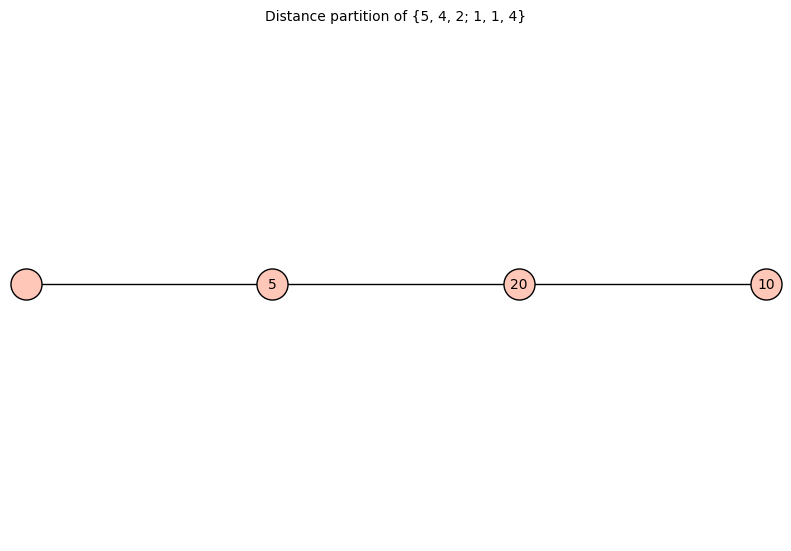

In [24]:
syl.distancePartition()

A distance partition corresponding to two vertices can be obtained by passing the distance between them as an argument to `distancePartition`.

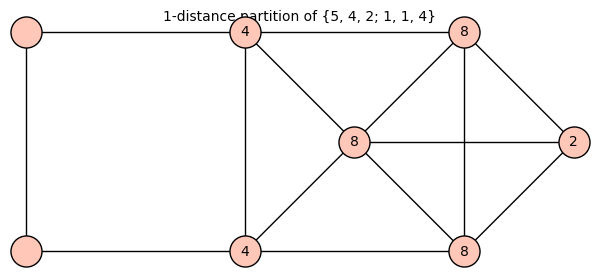

In [25]:
syl.distancePartition(1)

Note that edges are shown between any pair of cells such that their distances from either of the initial vertices differ by at most $1$. To show all the distance partitions corresponding to at most two vertices, the `show_distancePartitions` may be used (see below).

For a given triple of distances $(U, V, W)$ such that $p^W_{UV} > 0$, the method `tripleEquations` gives the solution to the system of equations relating triple intersection numbers to the intersection numbers, augmented by equations derived from the Krein condition for each triple $(i, j, h)$ $(1 \le i, j, h \le d)$ such that $q^h_{ij} = 0$. The solution is
returned as a `drg.Array3D` object.

In [26]:
syl.tripleEquations(1, 1, 2)

0: [0 0 0 0]
   [0 1 0 0]
   [0 0 0 0]
   [0 0 0 0]

1: [0 0 1 0]
   [0 0 0 0]
   [1 0 3 0]
   [0 0 0 0]

2: [0 0 0 0]
   [0 0 2 2]
   [0 2 2 4]
   [0 2 4 2]

3: [0 0 0 0]
   [0 0 0 0]
   [0 0 6 2]
   [0 0 2 0]

If the solution is not unique, one or more parameters will be present in the solution.

In [27]:
syl.tripleEquations(1, 2, 3)

0: [0 0 0 0]
   [0 0 1 0]
   [0 0 0 0]
   [0 0 0 0]

1: [0 0 0 1]
   [0 0 0 0]
   [0 1 2 1]
   [0 0 0 0]

2: [            0             0             0             0]
   [            0             0             3             1]
   [            0  1/2*r2 - 1/2  1/2*r2 + 7/2       -r2 + 5]
   [            1 -1/2*r2 + 5/2 -1/2*r2 + 9/2            r2]

3: [             0              0              0              0]
   [             0              0              0              0]
   [             0  -1/2*r2 + 7/2 -1/2*r2 + 13/2         r2 - 2]
   [             0   1/2*r2 - 3/2   1/2*r2 - 1/2        -r2 + 4]

Parameters may also be set explicitly by passing a `params` argument with a dictionary mapping the name of the parameter to the triple of distances it represents.

In [28]:
syl.tripleEquations(1, 3, 3, params = {"a": (3, 3, 3)})

0: [0 0 0 0]
   [0 0 0 1]
   [0 0 0 0]
   [0 0 0 0]

1: [0 0 0 1]
   [0 0 0 0]
   [0 0 4 0]
   [0 0 0 0]

2: [         0          0          0          0]
   [         0          0          4          0]
   [         0 -1/2*a + 4 -1/2*a + 4          a]
   [         0      1/2*a  1/2*a + 4     -a + 4]

3: [         0          0          0          0]
   [         0          0          0          0]
   [         0      1/2*a  1/2*a + 4     -a + 4]
   [         1 -1/2*a + 1     -1/2*a          a]

If the appropriate triple intersection number is computed to be zero, an edge will not be shown in the distance partition.

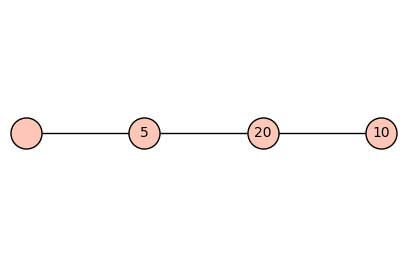

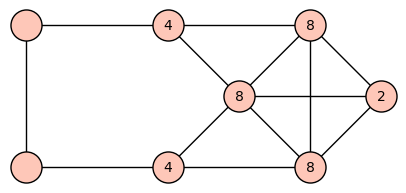

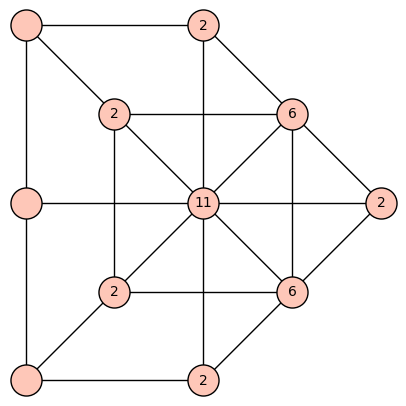

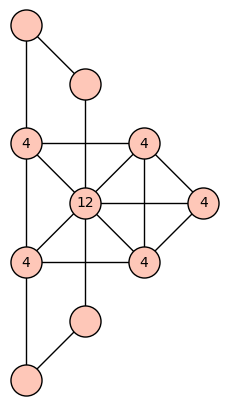

In [29]:
syl.show_distancePartitions()